<a href="https://colab.research.google.com/github/Anjani077/DeepFakeDetection/blob/main/deepfakedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib transformers


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Corrected the import statement from tensorflow.kera to tensorflow.keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")

print("Path to dataset files:", path)

100%|██████████| 3.75G/3.75G [00:51<00:00, 77.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2


In [ ]:
#Deal with the data
import os  # Import os module here to ensure it's available
base_path = "/xhlulu/140k-real-and-fake-faces"
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")
valid_path = os.path.join(base_path, "valid")

In [ ]:
#Deal with the data
import os  # Import os module here to ensure it's available
# Instead of hardcoding, use the 'path' variable returned by dataset_download
base_path = path[0]  # Assuming 'path' is a list containing the path string
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")
valid_path = os.path.join(base_path, "valid")

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anjani1611","key":"2718144f976d1456752a0ceb8dbd8203"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces
!unzip -q 140k-real-and-fake-faces.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [00:21<00:00, 227MB/s]
100% 3.75G/3.75G [00:21<00:00, 185MB/s]


In [ ]:
import os # Import the os module

base_path = "/content/data/real_vs_fake/real-vs-fake/"
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")
valid_path = os.path.join(base_path, "valid")

In [ ]:
print("Training real images: ", len(os.listdir(os.path.join(train_path, "real"))))
print("Training fake images: ", len(os.listdir(os.path.join(train_path, "fake"))))
print("Testing real images: ", len(os.listdir(os.path.join(test_path, "real"))))
print("Testing fake images: ", len(os.listdir(os.path.join(test_path, "fake"))))


Training real images:  50000
Training fake images:  50000
Testing real images:  10000
Testing fake images:  10000


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D # Import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential # Explicitly import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.


In [ ]:
valid_gen = datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


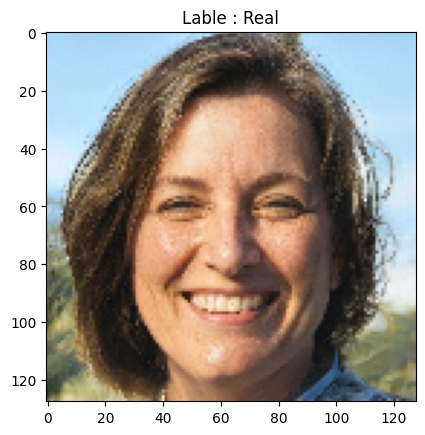

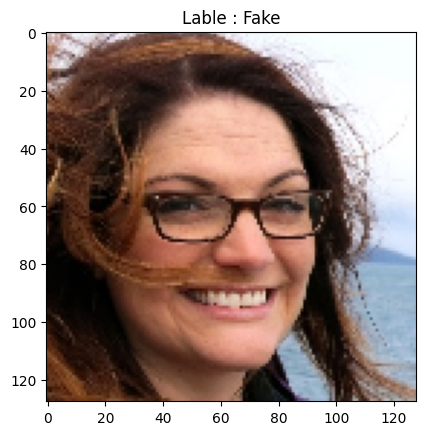

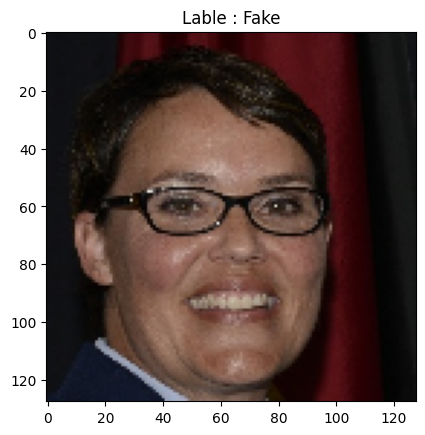

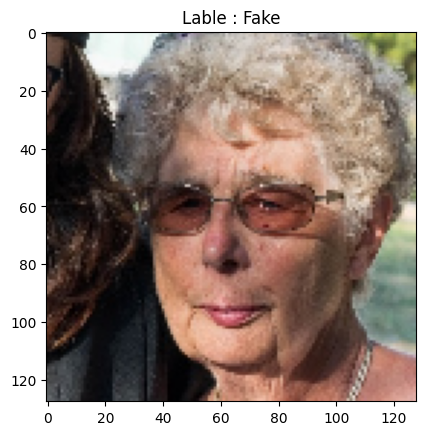

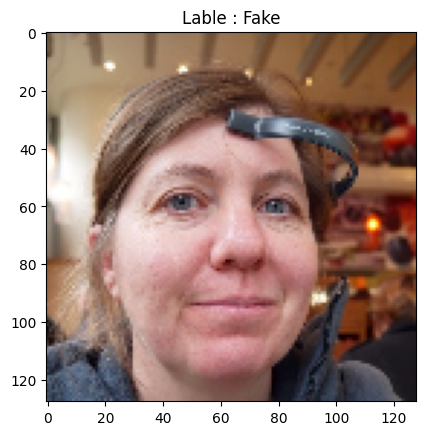

In [ ]:
import matplotlib.pyplot as plt # Import plt here

for images, labels in train_generator:
    for i in range(5):
      plt.imshow(images[i])
      plt.title(f"Lable : { 'Real' if labels[i]==0 else 'Fake'}")
      plt.show()

    break

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_gen,
    epochs=5,
    steps_per_epoch = train_generator.samples // 32,
    validation_steps = valid_gen.samples // 32
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3014s 960ms/step - accuracy: 0.4984 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2902s 929ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2992s 957ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2856s 914ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2941s 927ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
